<h1> Title: Emotion Recognition in text</h1>

<strong>Overview: In this notebook, I aim to detect and categorize emotion in text using ISEAR datasets</strong><br>
In this notebook, it covers:<br>
1.0 Obtain necessary data from original ISEAR datasets<br>
2.0 Data understanding<br>
3.0 Text Preprocessing<br>
4.0 Data Splitting<br>
5.0 Feature Extraction<br>
6.0 Model Development<br>
6.1 Machine Learning models<br>
6.2 Deep Learning models<br>
6.3 Transformer models<br>
7.0 Deployment<br>


Characteristics of ISEAR:
- Application Domain: social media
- Granularity: Blog
- Size: 7666 sentences
- Balanced
- Annotated
- Emotion labeled: Anger, disgust, fear, sadness, shame, joy, and guilt

In [2]:
# Basic Libraries
import pandas as pd  
import numpy as np  
import random  
import warnings  

# Text Processing Libraries
import nltk  
import contractions  
import spacy  
import string 
import re  

# Tokenization, Stopwords, Stemming, and Lemmatization
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords, wordnet  
from nltk.stem import PorterStemmer, WordNetLemmatizer  

# Feature Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text vectorization
from gensim.models import Word2Vec, FastText  # Word embedding models
from sklearn.model_selection import train_test_split, StratifiedKFold  
from sklearn.utils.class_weight import compute_class_weight  
import gensim.downloader  # Pretrained word embeddings

# Machine Learning Model Libraries
from sklearn.naive_bayes import MultinomialNB  
from sklearn.svm import SVC  
from sklearn.decomposition import PCA  
from sklearn.manifold import TSNE  
from sklearn.preprocessing import LabelEncoder 

# Deep Learning Libraries
import tensorflow as tf  
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenization for deep learning
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Sequence padding
from tensorflow.keras.models import Sequential, Model  # Model building
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, SimpleRNN, 
    Bidirectional, LSTM, Input, Concatenate, GlobalMaxPooling1D, BatchNormalization, LayerNormalization
)  # Layers for deep learning models
from tensorflow.keras.optimizers import Adam  # Optimizer
from tensorflow.keras.regularizers import l2  # Regularization
from tensorflow.keras.callbacks import EarlyStopping 

# Transformer-Based Libraries
from transformers import create_optimizer  # Optimizer for Transformers
from transformers import TFBertForSequenceClassification, BertTokenizer
from transformers import TFXLNetForSequenceClassification, XLNetTokenizer
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
from transformers import TFRobertaForSequenceClassification, RobertaTokenizer

# Statistical mode function
from scipy.stats import mode  

# File Handling & Serialization
import pickle  # Save and load Python objects
import os  # OS file operations
from pathlib import Path  # Path management

# Data Visualization Libraries
import seaborn as sns 
import matplotlib.pyplot as plt  
from wordcloud import WordCloud  

# Performance Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, 
    confusion_matrix
)  

# Ignore Warnings
warnings.filterwarnings("ignore")

# Download Required NLTK Resources
nltk.download('punkt')  # Tokenization
nltk.download('stopwords')  # Stopwords list
nltk.download('averaged_perceptron_tagger')  # POS tagging
nltk.download('wordnet')  # WordNet corpus for lemmatization
nltk.download('omw-1.4')  # WordNet synonyms


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

---
# 1.0 Obtain dataset
- The dataset is obtained and stored in separate isear.csv.

In [3]:
data = pd.read_csv('../Datasets/ori_isear.csv')

isear = data[['Field1', 'SIT']]

# Rename the columns
isear = isear.rename(columns={'Field1': 'emotion', 'SIT': 'text'})

# Save to new CSV file
isear.to_csv('../Datasets/isear.csv', index=False)

In [4]:
# Load dataset
df = pd.read_csv('../Datasets/isear.csv')
df

,emotion,text
0,joy,"During the period of being in love, each time ..."
1,fear,When I was involved in a traffic accident.
2,anger,It infuriated me when the motorist did not let...
3,sadness,When I lost the person who meant the most to me.
4,disgust,The time I saw a deer knocked and the sight of...
...,...,...
7523,disgust,Two years back someone invited me to be the tu...
7524,disgust,I had taken the responsibility to do something...
7525,joy,I was at home and I heard a loud sound of spit...
7526,shame,I did not do the homework that the teacher had...


---
# 2.0 Data understanding

In [5]:
df.head()

,emotion,text
0,joy,"During the period of being in love, each time ..."
1,fear,When I was involved in a traffic accident.
2,anger,It infuriated me when the motorist did not let...
3,sadness,When I lost the person who meant the most to me.
4,disgust,The time I saw a deer knocked and the sight of...


In [6]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (7528, 2)
Columns are: Index(['emotion', 'text'], dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7528 entries, 0 to 7527
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  7528 non-null   object
 1   text     7528 non-null   object
dtypes: object(2)
memory usage: 117.8+ KB


In [8]:
# Value Counts
df['emotion'].value_counts()

emotion
joy        1088
guilt      1083
fear       1079
anger      1076
sadness    1074
shame      1066
disgust    1062
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

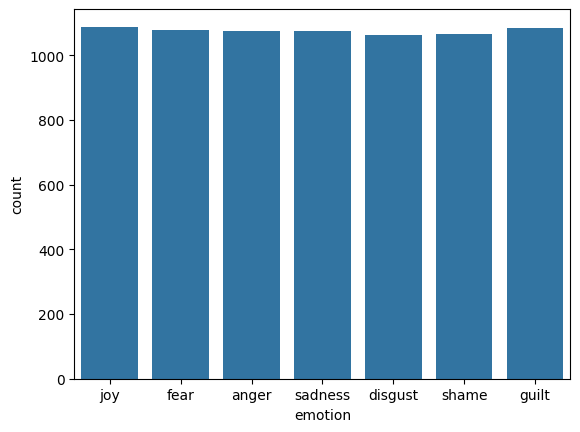

In [9]:
# Plot
sns.countplot(x='emotion',data=df)

---
# 3.0 Text preprocessing
- Lowercasing
- Expanding contractions
- Removing punctuation, special characters, digits
- Tokenization
- Handling negations
- POS tagging
- Stemming and Lemmatization
- Removing stopwords
- Data augmentation such as paraphrasing and synonym replacement
- Encoding such as one-hot or integer encoding

In [10]:
# Lowercase
df['text'] = df['text'].str.lower()

In [11]:
# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

df['text'] = df['text'].apply(expand_contractions)
df['text'][:5]

0    during the period of being in love, each time ...
1           when i was involved in a traffic accident.
2    it infuriated me when the motorist did not let...
3    when i lost the person who meant the most to me. 
4    the time i saw a deer knocked and the sight of...
Name: text, dtype: object

In [12]:
# Remove punctuation, special characters, digits, emojis, and extra whitespace
def clean_text(text):
    text = re.sub(r'[-—]', ' ', text) # Replace hyphens/dashes with spaces to avoid merged words
    
    text = text.encode('ascii', 'ignore').decode('ascii')  # Remove non-ASCII

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Keep only letters and spaces

    text = ' '.join(text.split())  # Clean whitespace
    return text

df['text'] = df['text'].apply(clean_text)

In [13]:
# Tokenization
df['tokens'] = df['text'].apply(word_tokenize)
df['tokens'][:5]

0    [during, the, period, of, being, in, love, eac...
1    [when, i, was, involved, in, a, traffic, accid...
2    [it, infuriated, me, when, the, motorist, did,...
3    [when, i, lost, the, person, who, meant, the, ...
4    [the, time, i, saw, a, deer, knocked, and, the...
Name: tokens, dtype: object

In [14]:
# Handle negations 
def handle_negations(tokens):
    negation_words = {"not", "no", "never", "n't", "neither", "nor"}
    new_tokens = []
    i = 0

    while i < len(tokens):
        if tokens[i] in negation_words and i + 1 < len(tokens):
            new_tokens.append(tokens[i] + "_" + tokens[i + 1])  # Merge negation with the next word
            i += 2 
        else:
            new_tokens.append(tokens[i])
            i += 1

    return new_tokens  

df['tokens'] = df['tokens'].apply(handle_negations)
df['tokens'][:5]

0    [during, the, period, of, being, in, love, eac...
1    [when, i, was, involved, in, a, traffic, accid...
2    [it, infuriated, me, when, the, motorist, did,...
3    [when, i, lost, the, person, who, meant, the, ...
4    [the, time, i, saw, a, deer, knocked, and, the...
Name: tokens, dtype: object

In [15]:
# Pos tagging
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()  
    tag_dict = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) 

In [16]:
# Stemming and Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
df['stemmed'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

df['lemmatized'] = df['tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
)
df[['stemmed','lemmatized']][:5]

,stemmed,lemmatized
0,"[dure, the, period, of, be, in, love, each, ti...","[during, the, period, of, be, in, love, each, ..."
1,"[when, i, wa, involv, in, a, traffic, accid]","[when, i, be, involve, in, a, traffic, accident]"
2,"[it, infuri, me, when, the, motorist, did, not...","[it, infuriate, me, when, the, motorist, do, n..."
3,"[when, i, lost, the, person, who, meant, the, ...","[when, i, lose, the, person, who, meant, the, ..."
4,"[the, time, i, saw, a, deer, knock, and, the, ...","[the, time, i, saw, a, deer, knock, and, the, ..."


Lemmatized words are used for better accuracy and meaning matter.

- Lemmatization: Converts words to their base/dictionary form
- Stemming: Chops off word endings to get the root form

In [17]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['lemmatized'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df['filtered_tokens'][:5]

0    [period, love, time, met, especially, not_met,...
1                         [involve, traffic, accident]
2             [infuriate, motorist, not_let, overtake]
3                                [lose, person, meant]
4    [time, saw, deer, knock, sight, animal, injury...
Name: filtered_tokens, dtype: object

In [18]:
# Data augmentation: Synonym Replacement
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ")  
            if synonym.lower() != word.lower():  
                synonyms.add(synonym)
    return list(synonyms)

def synonym_replacement(tokens, n=1):
    new_tokens = tokens.copy()
    
    candidate_words = [word for word in tokens if get_synonyms(word)]
    if not candidate_words:
        return tokens  # No valid words to replace
    
    random.shuffle(candidate_words)  
    num_replaced = 0
    
    for word in candidate_words:
        synonyms = get_synonyms(word)
        if synonyms:
            synonym = random.choice(synonyms)  
            new_tokens = [synonym if w == word else w for w in new_tokens]
            num_replaced += 1
        if num_replaced >= n:
            break  
    
    return new_tokens

# Example of Synonym Replacement
df['augmented_tokens'] = df['filtered_tokens'].apply(lambda tokens: synonym_replacement(tokens, n=2))
df['augmented_tokens'][:5]

0    [stop, love, sentence, met, especially, not_me...
1                         [ask, traffic, chance event]
2             [infuriate, automobilist, not_let, pass]
3                               [miss, someone, meant]
4    [time, saw, deer, knock, sight, animal, injury...
Name: augmented_tokens, dtype: object

In [19]:
# Encoding (One-hot and Integer Encoding)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['filtered_tokens'])

df['integer_encoded'] = tokenizer.texts_to_sequences(df['filtered_tokens'])
# df['one_hot_encoded'] = list(tokenizer.texts_to_matrix(df['augmented_tokens'], mode='binary'))

df.head()

,emotion,text,tokens,stemmed,lemmatized,filtered_tokens,augmented_tokens,integer_encoded
0,joy,during the period of being in love each time t...,"[during, the, period, of, being, in, love, eac...","[dure, the, period, of, be, in, love, each, ti...","[during, the, period, of, be, in, love, each, ...","[period, love, time, met, especially, not_met,...","[stop, love, sentence, met, especially, not_me...","[424, 57, 6, 111, 449, 1935, 85, 6]"
1,fear,when i was involved in a traffic accident,"[when, i, was, involved, in, a, traffic, accid...","[when, i, wa, involv, in, a, traffic, accid]","[when, i, be, involve, in, a, traffic, accident]","[involve, traffic, accident]","[ask, traffic, chance event]","[311, 653, 123]"
2,anger,it infuriated me when the motorist did not let...,"[it, infuriated, me, when, the, motorist, did,...","[it, infuri, me, when, the, motorist, did, not...","[it, infuriate, me, when, the, motorist, do, n...","[infuriate, motorist, not_let, overtake]","[infuriate, automobilist, not_let, pass]","[3893, 3894, 843, 1513]"
3,sadness,when i lost the person who meant the most to me,"[when, i, lost, the, person, who, meant, the, ...","[when, i, lost, the, person, who, meant, the, ...","[when, i, lose, the, person, who, meant, the, ...","[lose, person, meant]","[miss, someone, meant]","[88, 19, 684]"
4,disgust,the time i saw a deer knocked and the sight of...,"[the, time, i, saw, a, deer, knocked, and, the...","[the, time, i, saw, a, deer, knock, and, the, ...","[the, time, i, saw, a, deer, knock, and, the, ...","[time, saw, deer, knock, sight, animal, injury...","[time, saw, deer, knock, sight, animal, injury...","[6, 21, 2301, 370, 1089, 542, 1689, 2302, 10, ..."


---
# 4.0 Data splitting
- 80% Train set
- 10% Test set
- 10% Validation set

In [20]:
# Split data using processed tokens
X_train, X_temp, y_train, y_temp = train_test_split(
    df['filtered_tokens'], df['emotion'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
# Perform data augmentation (synonym augmentation) on training set
X_augmented_train = X_train.apply(lambda tokens: synonym_replacement(tokens, n=2))
X_augmented_train = pd.concat([X_train, X_augmented_train]).sample(frac=1, random_state=42).reset_index(drop=True)
y_train_concat = pd.concat([y_train, y_train]).sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
# Calculate class weights before model training to check the classes distribution
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict


{0: 1.0038339723287215,
 1: 1.016886187098953,
 2: 1.0085412828671914,
 3: 1.0132929496887093,
 4: 0.9590699155916548,
 5: 1.0038339723287215,
 6: 0.9968548253600398}

---
# 5.0 Feature Extraction
- Bag of Words
- TF-IDF
- N-gram
- Word Embeddings such as Word2Vec, FastText

### 5.1 Traditional Feature Extraction

In [23]:
# Convert tokens back to text for BoW, TF-IDF, and N-grams
X_train_texts = [' '.join(tokens) for tokens in X_augmented_train]
X_val_texts = [' '.join(tokens) for tokens in X_val]
X_test_texts = [' '.join(tokens) for tokens in X_test]

In [24]:
# Function to plot WordCloud
def plot_word_cloud(feature_names, feature_scores, title):
    # Create a dictionary for word frequencies
    word_freq = dict(zip(feature_names, feature_scores))
    
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq) # Generate WordCloud
    
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

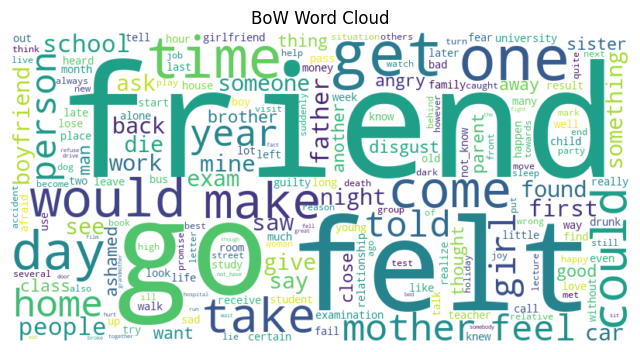

In [25]:
# Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train_texts)
X_val_bow = bow_vectorizer.transform(X_val_texts)
X_test_bow = bow_vectorizer.transform(X_test_texts)

# Visualizing BoW using Word Cloud
bow_feature_names = bow_vectorizer.get_feature_names_out()
bow_scores = X_train_bow.toarray().sum(axis=0)  # Word frequency

plot_word_cloud(bow_feature_names, bow_scores, title="BoW Word Cloud")

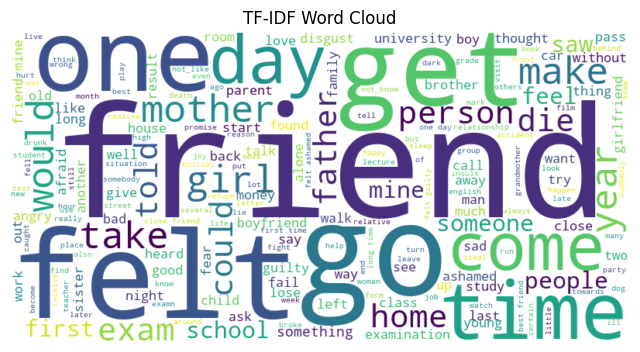

In [26]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))  # Unigrams and bigrams
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_texts)
X_val_tfidf = tfidf_vectorizer.transform(X_val_texts)
X_test_tfidf = tfidf_vectorizer.transform(X_test_texts)

# Visualizing TF-IDF using Word Cloud
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(X_train_tfidf.mean(axis=0)).flatten()

plot_word_cloud(tfidf_feature_names, tfidf_scores, title="TF-IDF Word Cloud")

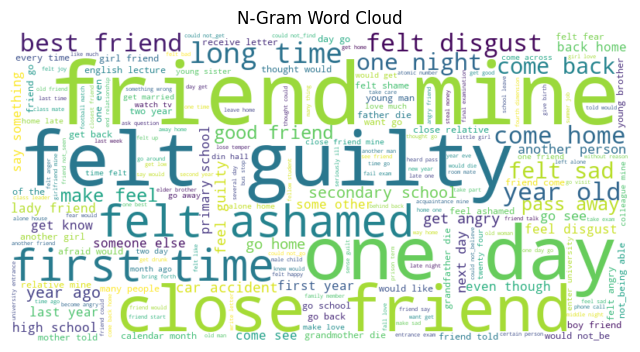

In [27]:
# BoW with N-grams (Bi-grams & Tri-grams)
ngram_vectorizer = CountVectorizer(ngram_range=(2,3))
X_train_ngram = ngram_vectorizer.fit_transform(X_train_texts)
X_val_ngram = ngram_vectorizer.transform(X_val_texts)
X_test_ngram = ngram_vectorizer.transform(X_test_texts)

# Visualizing N-grams using Word Cloud
ngram_feature_names = ngram_vectorizer.get_feature_names_out()
ngram_scores = np.array(X_train_ngram.sum(axis=0)).flatten() # Word frequency

plot_word_cloud(ngram_feature_names, ngram_scores, title="N-Gram Word Cloud")

### 5.2 Pretrained Word Embeddings

In [28]:
# Function to plot PCA and t-SNE Visualization for word embeddings
def visualize_embeddings(embedding_model, method, num_words=30, title_suffix=""):
    # Get vocabulary and word vectors
    vocab = list(embedding_model.wv.index_to_key)  
    words = vocab[:num_words]  # Select first `num_words` words

    word_vectors = np.array([embedding_model.wv[word] for word in words])

    if method == "pca":
        reducer = PCA(n_components=2)
        title = f"PCA Visualization of Word Embeddings {title_suffix}"
    elif method == "tsne":
        reducer = TSNE(n_components=2, perplexity=10, random_state=42)
        title = f"t-SNE Visualization of Word Embeddings {title_suffix}"

    reduced_vectors = reducer.fit_transform(word_vectors)

    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

In [29]:
# Word Embeddings: Word2Vec using pre-trained Google News vectors
w2v_vectors = gensim.downloader.load('word2vec-google-news-300')

# w2v_model = Word2Vec(sentences=X_augmented_train.tolist(), vector_size=100, window=5, min_count=1, workers=4)
# word_vectors = w2v_model.wv  # Get word vectors

# Visualizing Word2Vec using PCA and t-SNE
# visualize_embeddings(w2v_model, method="pca", num_words=30)
# visualize_embeddings(w2v_model, method="tsne", num_words=30)

In [30]:
# Word Embeddings: FastText using English pre-trained FastText (300d)
fasttext_vectors = gensim.downloader.load('fasttext-wiki-news-subwords-300')

# fasttext_model = FastText(sentences=X_augmented_train.tolist(), vector_size=100, window=5, min_count=1, workers=4)
# fasttext_vectors = fasttext_model.wv  # Get word vectors

# Visualizing FastText using PCA and t-SNE
# visualize_embeddings(fasttext_model, method="pca", num_words=30)
# visualize_embeddings(fasttext_model, method="tsne", num_words=30)

---
# 6.0 Models Development
## 6.1 Machine Learning models
- Naive Bayes
- Support Vector Machine (SVM)

In [31]:
# Function to train and evaluate Machine Learning model 
def train_ML_model(model, X_train, X_val, y_train, y_val, X_test, y_test, model_name):
    print(f"=== {model_name} ===")
    
    # Train on training set
    model.fit(X_train, y_train)

    # Evaluate on Validation Set 
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{model_name} - Validation Accuracy: {val_accuracy:.4f}")
    
    # Final Evaluation on Test Set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}")
    
    print(f"\nClassification Report ({model_name}):\n", classification_report(y_test, y_test_pred))
    
    # Confusion Matrix for Test Set
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return model

### 6.1.1 Naive Bayes

=== Naive Bayes with BoW ===
Naive Bayes with BoW - Validation Accuracy: 0.5591
Naive Bayes with BoW - Test Accuracy: 0.5498

Classification Report (Naive Bayes with BoW):
               precision    recall  f1-score   support

       anger       0.61      0.61      0.61       108
     disgust       0.51      0.46      0.48       109
        fear       0.38      0.38      0.38       105
       guilt       0.60      0.65      0.63       109
         joy       0.61      0.64      0.63        97
     sadness       0.60      0.55      0.57       119
       shame       0.52      0.57      0.54       106

    accuracy                           0.55       753
   macro avg       0.55      0.55      0.55       753
weighted avg       0.55      0.55      0.55       753



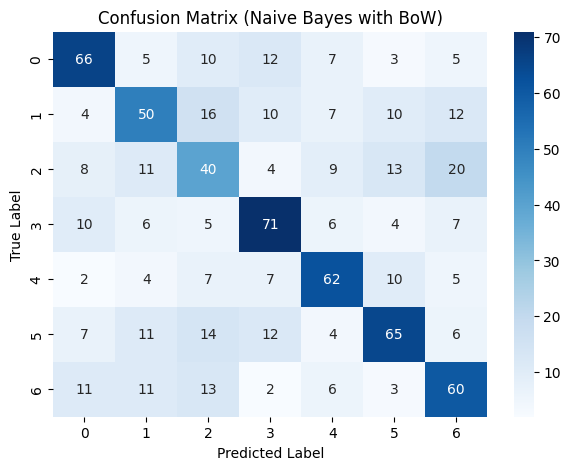

=== Naive Bayes with TF-IDF ===
Naive Bayes with TF-IDF - Validation Accuracy: 0.5631
Naive Bayes with TF-IDF - Test Accuracy: 0.5710

Classification Report (Naive Bayes with TF-IDF):
               precision    recall  f1-score   support

       anger       0.64      0.60      0.62       108
     disgust       0.52      0.43      0.47       109
        fear       0.46      0.49      0.47       105
       guilt       0.60      0.65      0.62       109
         joy       0.59      0.72      0.65        97
     sadness       0.64      0.56      0.60       119
       shame       0.55      0.56      0.55       106

    accuracy                           0.57       753
   macro avg       0.57      0.57      0.57       753
weighted avg       0.57      0.57      0.57       753



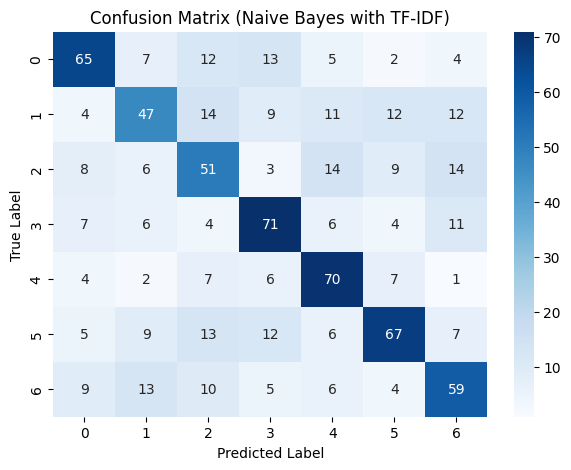

=== Naive Bayes with N-grams ===
Naive Bayes with N-grams - Validation Accuracy: 0.4143
Naive Bayes with N-grams - Test Accuracy: 0.3971

Classification Report (Naive Bayes with N-grams):
               precision    recall  f1-score   support

       anger       0.50      0.47      0.48       108
     disgust       0.35      0.26      0.30       109
        fear       0.38      0.34      0.36       105
       guilt       0.50      0.46      0.48       109
         joy       0.27      0.62      0.37        97
     sadness       0.52      0.33      0.40       119
       shame       0.45      0.33      0.38       106

    accuracy                           0.40       753
   macro avg       0.42      0.40      0.40       753
weighted avg       0.43      0.40      0.40       753



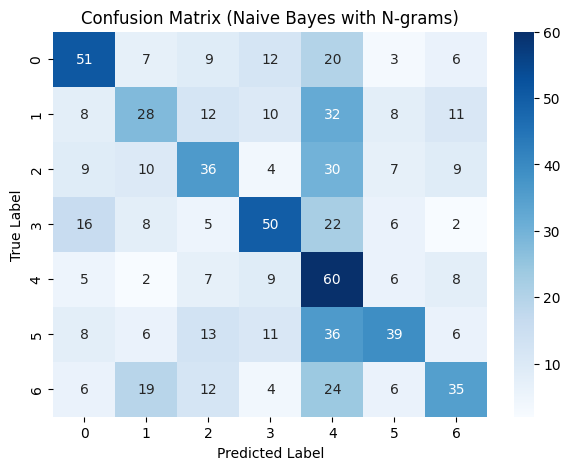

In [32]:
# Naive Bayes model
nb_model = MultinomialNB()

#  Train and evaluate Naive Bayes model
nb_bow = train_ML_model(nb_model, X_train_bow, X_val_bow, y_train_concat, y_val, X_test_bow, y_test, model_name="Naive Bayes with BoW")
nb_tfidf = train_ML_model(nb_model, X_train_tfidf, X_val_tfidf, y_train_concat, y_val, X_test_tfidf, y_test, model_name="Naive Bayes with TF-IDF")
nb_ngram = train_ML_model(nb_model, X_train_ngram, X_val_ngram, y_train_concat, y_val, X_test_ngram, y_test, model_name="Naive Bayes with N-grams")


### 6.1.2 Support Vector Machine (SVM)

=== SVM with BoW ===
SVM with BoW - Validation Accuracy: 0.5232
SVM with BoW - Test Accuracy: 0.5538

Classification Report (SVM with BoW):
               precision    recall  f1-score   support

       anger       0.61      0.61      0.61       108
     disgust       0.46      0.46      0.46       109
        fear       0.40      0.47      0.43       105
       guilt       0.59      0.68      0.63       109
         joy       0.66      0.63      0.65        97
     sadness       0.62      0.55      0.58       119
       shame       0.56      0.49      0.52       106

    accuracy                           0.55       753
   macro avg       0.56      0.55      0.55       753
weighted avg       0.56      0.55      0.55       753



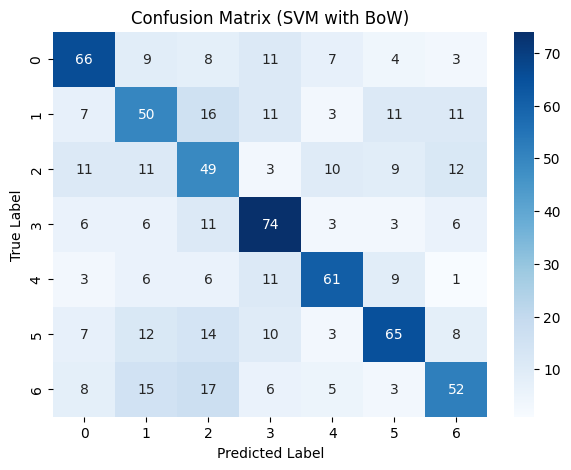

=== SVM with TF-IDF ===
SVM with TF-IDF - Validation Accuracy: 0.5644
SVM with TF-IDF - Test Accuracy: 0.5857

Classification Report (SVM with TF-IDF):
               precision    recall  f1-score   support

       anger       0.66      0.61      0.63       108
     disgust       0.54      0.47      0.50       109
        fear       0.46      0.46      0.46       105
       guilt       0.59      0.72      0.65       109
         joy       0.64      0.70      0.67        97
     sadness       0.62      0.62      0.62       119
       shame       0.58      0.53      0.55       106

    accuracy                           0.59       753
   macro avg       0.58      0.59      0.58       753
weighted avg       0.58      0.59      0.58       753



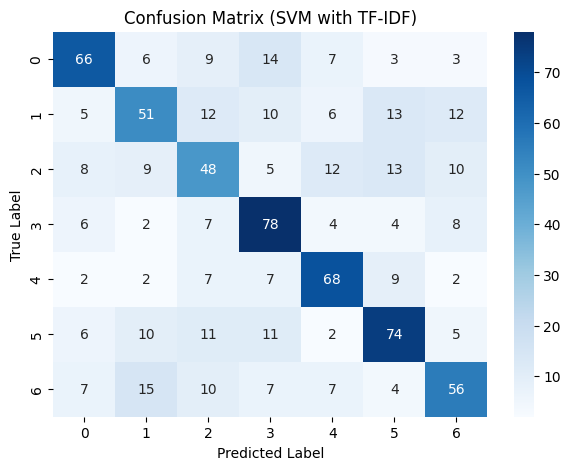

=== SVM with N-grams ===
SVM with N-grams - Validation Accuracy: 0.2961
SVM with N-grams - Test Accuracy: 0.2523

Classification Report (SVM with N-grams):
               precision    recall  f1-score   support

       anger       0.43      0.44      0.44       108
     disgust       0.75      0.11      0.19       109
        fear       0.50      0.03      0.05       105
       guilt       0.16      0.87      0.27       109
         joy       0.67      0.04      0.08        97
     sadness       0.86      0.10      0.18       119
       shame       0.94      0.15      0.26       106

    accuracy                           0.25       753
   macro avg       0.62      0.25      0.21       753
weighted avg       0.62      0.25      0.21       753



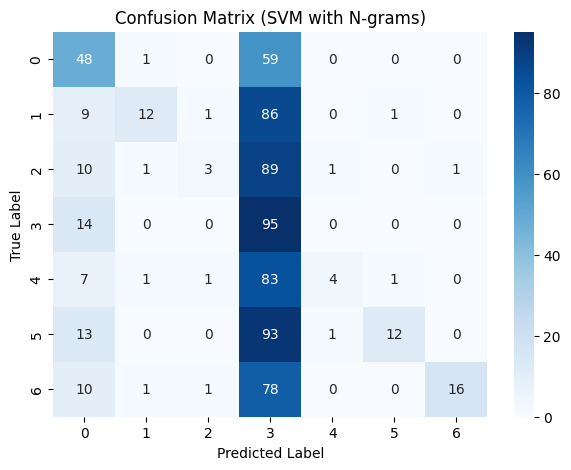

In [33]:
# Support Vector Machine (SVM) model
svm_model = SVC()

# Train and evaluate SVM model 
svm_bow = train_ML_model(svm_model, X_train_bow, X_val_bow, y_train_concat, y_val, X_test_bow, y_test, model_name="SVM with BoW")
svm_tfidf = train_ML_model(svm_model, X_train_tfidf, X_val_tfidf, y_train_concat, y_val, X_test_tfidf, y_test, model_name="SVM with TF-IDF")
svm_ngram = train_ML_model(svm_model, X_train_ngram, X_val_ngram, y_train_concat, y_val, X_test_ngram, y_test, model_name="SVM with N-grams")

## 6.2 Deep Learning models
- CNN
- RNN
- BiLSTM


In [34]:
# Encoding labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train_concat)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

In [35]:
# Tokenization and padding for deep learning models
max_words = 10000  # Maximum vocabulary size
max_len = 100     # Maximum length of input sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_augmented_train)

X_train_seq = tokenizer.texts_to_sequences(X_augmented_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [36]:
# Function to create embedding matrix
def create_embedding_matrix(word_index, embedding_vectors):
    embedding_dim = 300  # Match pre-trained dimension
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    
    for word, i in word_index.items():
        if word in embedding_vectors:
            embedding_matrix[i] = embedding_vectors[word]
        else:
            # Enhanced OOV handling with smaller random initialization
            embedding_matrix[i] = np.random.normal(
                loc=0.0, 
                scale=0.6, 
                size=(embedding_dim,)
            )
    return embedding_matrix


# Preparing the embedding matrices
embedding_matrix_w2v = create_embedding_matrix(tokenizer.word_index, w2v_vectors)
embedding_matrix_ft = create_embedding_matrix(tokenizer.word_index, fasttext_vectors)

In [37]:
# Function to train and evaluate deep learning models
def train_DL_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name, epochs=10, batch_size=32):
    # Callbacks for validation tuning
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            patience=4,                 # Stops if no improvement for 4 epochs
            restore_best_weights=True   # Restores the best model weights
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            factor=0.5,                 # Reduces learning rate by half
            patience=2,                 # Triggers if no improvement for 2 epochs  
            min_lr=1e-6                 # Sets a minimum learning rate
        )
    ]
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=2,
        callbacks=callbacks
    )
    
# Plot training history
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print(f"\n=== {model_name} ===")
    # Best val accuracy
    final_val_accuracy = max(history.history['val_accuracy'])  
    print(f"{model_name} - Best Validation Accuracy: {final_val_accuracy:.4f}")

    # Final Evaluation on Test Set
    y_test_pred = np.argmax(model.predict(X_test), axis=1)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{model_name} - Test Accuracy: {test_accuracy:.4f}')
    
    print(f"\nClassification Report ({model_name}):\n", 
          classification_report(y_test, y_test_pred))
    
    # Confusion Matrix for Test Set
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return history


### 6.2.1 CNN

In [38]:
# CNN model 
def cnn_model(embedding_matrix, word_index, embedding_dim=100):
    model = Sequential([
        Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, 
                  weights=[embedding_matrix], input_length=max_len, trainable=True),
        Conv1D(256, 5, activation='relu'),  
        Conv1D(128, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(len(set(y_train)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/10
377/377 - 23s - 61ms/step - accuracy: 0.2233 - loss: 1.8823 - val_accuracy: 0.4303 - val_loss: 1.5929 - learning_rate: 0.0010
Epoch 2/10
377/377 - 15s - 39ms/step - accuracy: 0.4744 - loss: 1.4360 - val_accuracy: 0.5286 - val_loss: 1.3199 - learning_rate: 0.0010
Epoch 3/10
377/377 - 15s - 41ms/step - accuracy: 0.6443 - loss: 1.0475 - val_accuracy: 0.5498 - val_loss: 1.3555 - learning_rate: 0.0010
Epoch 4/10
377/377 - 15s - 40ms/step - accuracy: 0.7639 - loss: 0.7242 - val_accuracy: 0.5564 - val_loss: 1.5562 - learning_rate: 0.0010
Epoch 5/10
377/377 - 16s - 42ms/step - accuracy: 0.8564 - loss: 0.4592 - val_accuracy: 0.5485 - val_loss: 1.8318 - learning_rate: 5.0000e-04
Epoch 6/10
377/377 - 17s - 46ms/step - accuracy: 0.8936 - loss: 0.3421 - val_accuracy: 0.5551 - val_loss: 2.0223 - learning_rate: 5.0000e-04


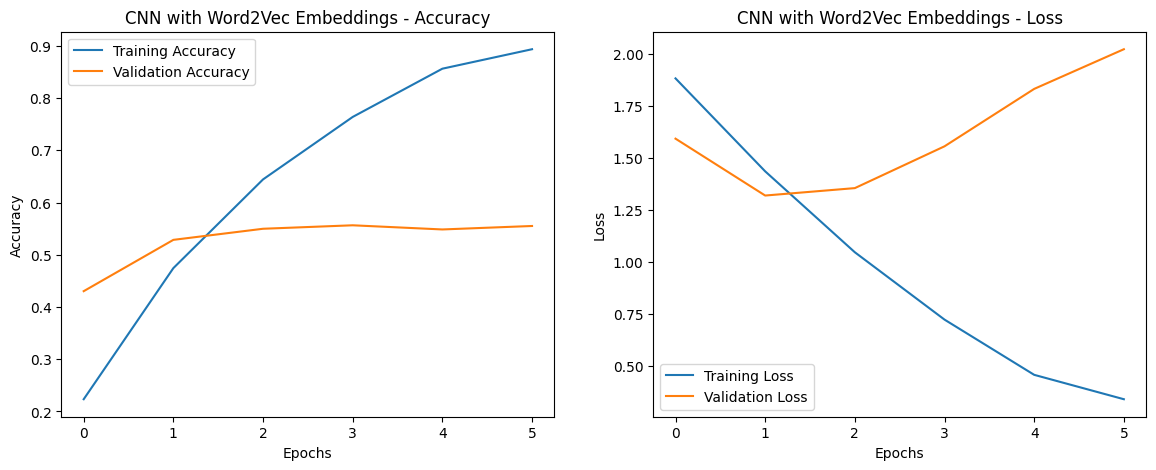


=== CNN with Word2Vec Embeddings ===
CNN with Word2Vec Embeddings - Best Validation Accuracy: 0.5564
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
CNN with Word2Vec Embeddings - Test Accuracy: 0.5471

Classification Report (CNN with Word2Vec Embeddings):
               precision    recall  f1-score   support

           0       0.53      0.69      0.60       108
           1       0.50      0.39      0.44       109
           2       0.38      0.38      0.38       105
           3       0.59      0.69      0.63       109
           4       0.69      0.64      0.66        97
           5       0.56      0.64      0.60       119
           6       0.61      0.41      0.49       106

    accuracy                           0.55       753
   macro avg       0.55      0.55      0.54       753
weighted avg       0.55      0.55      0.54       753



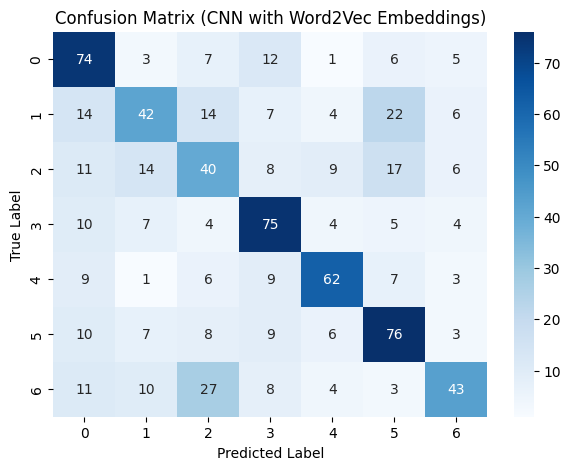

In [39]:
# Train and evaluate CNN model with Word2Vec embeddings
cnn_w2v = cnn_model(embedding_matrix_w2v, tokenizer.word_index, embedding_dim=300)
train_DL_model(cnn_w2v, X_train_pad, y_train_enc, X_val_pad, y_val_enc, X_test_pad, y_test_enc, model_name="CNN with Word2Vec Embeddings")

Epoch 1/10
377/377 - 18s - 49ms/step - accuracy: 0.1792 - loss: 1.9402 - val_accuracy: 0.2908 - val_loss: 1.8510 - learning_rate: 0.0010
Epoch 2/10
377/377 - 17s - 45ms/step - accuracy: 0.3757 - loss: 1.6178 - val_accuracy: 0.4900 - val_loss: 1.4386 - learning_rate: 0.0010
Epoch 3/10
377/377 - 17s - 45ms/step - accuracy: 0.5928 - loss: 1.1719 - val_accuracy: 0.5299 - val_loss: 1.3955 - learning_rate: 0.0010
Epoch 4/10
377/377 - 17s - 45ms/step - accuracy: 0.7327 - loss: 0.8088 - val_accuracy: 0.5312 - val_loss: 1.5569 - learning_rate: 0.0010
Epoch 5/10
377/377 - 17s - 45ms/step - accuracy: 0.8230 - loss: 0.5672 - val_accuracy: 0.5020 - val_loss: 1.8908 - learning_rate: 0.0010
Epoch 6/10
377/377 - 17s - 45ms/step - accuracy: 0.8755 - loss: 0.4048 - val_accuracy: 0.5299 - val_loss: 2.0800 - learning_rate: 5.0000e-04
Epoch 7/10
377/377 - 17s - 46ms/step - accuracy: 0.9072 - loss: 0.2935 - val_accuracy: 0.5113 - val_loss: 2.4051 - learning_rate: 5.0000e-04


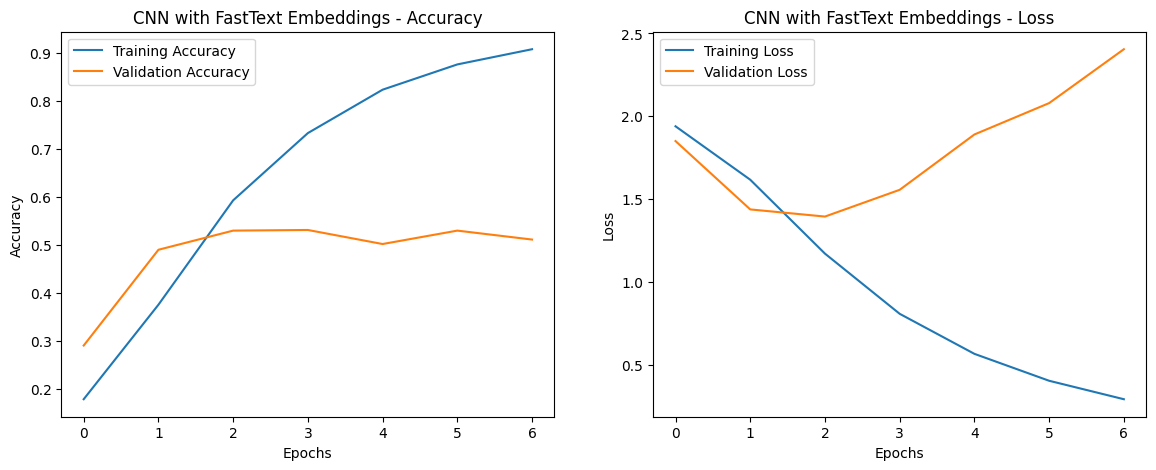


=== CNN with FastText Embeddings ===
CNN with FastText Embeddings - Best Validation Accuracy: 0.5312
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN with FastText Embeddings - Test Accuracy: 0.5405

Classification Report (CNN with FastText Embeddings):
               precision    recall  f1-score   support

           0       0.68      0.54      0.60       108
           1       0.39      0.55      0.46       109
           2       0.36      0.25      0.29       105
           3       0.50      0.80      0.62       109
           4       0.68      0.65      0.67        97
           5       0.71      0.56      0.63       119
           6       0.55      0.43      0.49       106

    accuracy                           0.54       753
   macro avg       0.56      0.54      0.54       753
weighted avg       0.56      0.54      0.54       753



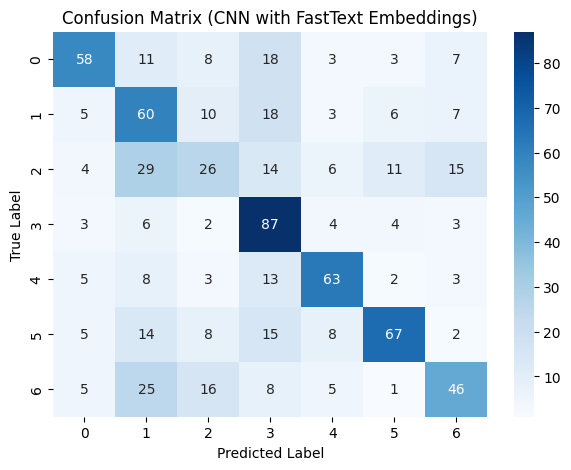

In [40]:
# Train and evaluate CNN model with FastText embeddings
cnn_ft = cnn_model(embedding_matrix_ft, tokenizer.word_index, embedding_dim=300)
train_DL_model(cnn_ft, X_train_pad, y_train_enc, X_val_pad, y_val_enc, X_test_pad, y_test_enc, model_name="CNN with FastText Embeddings")

### 6.2.2 RNN

In [41]:
# RNN model
def rnn_model(embedding_matrix, word_index, embedding_dim=100):
    model = Sequential([
        Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim,
                  weights=[embedding_matrix], input_length=max_len, trainable=True),
        SimpleRNN(128, return_sequences=True, activation='relu'),
        Dropout(0.5),
        SimpleRNN(64, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(len(set(y_train)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/10
377/377 - 17s - 44ms/step - accuracy: 0.1562 - loss: 1.9643 - val_accuracy: 0.2231 - val_loss: 1.9394 - learning_rate: 0.0010
Epoch 2/10
377/377 - 14s - 36ms/step - accuracy: 0.1817 - loss: 1.9324 - val_accuracy: 0.2975 - val_loss: 1.8687 - learning_rate: 0.0010
Epoch 3/10
377/377 - 14s - 36ms/step - accuracy: 0.2777 - loss: 1.7761 - val_accuracy: 0.3918 - val_loss: 1.6099 - learning_rate: 0.0010
Epoch 4/10
377/377 - 14s - 36ms/step - accuracy: 0.4102 - loss: 1.4953 - val_accuracy: 0.4675 - val_loss: 1.5038 - learning_rate: 0.0010
Epoch 5/10
377/377 - 14s - 36ms/step - accuracy: 0.5353 - loss: 1.2374 - val_accuracy: 0.4980 - val_loss: 1.4414 - learning_rate: 0.0010
Epoch 6/10
377/377 - 1896s - 5s/step - accuracy: 0.6279 - loss: 1.0269 - val_accuracy: 0.5060 - val_loss: 1.5408 - learning_rate: 0.0010
Epoch 7/10
377/377 - 5289s - 14s/step - accuracy: 0.7020 - loss: 0.8566 - val_accuracy: 0.5073 - val_loss: 1.6569 - learning_rate: 0.0010
Epoch 8/10
377/377 - 13s - 34ms/step - a

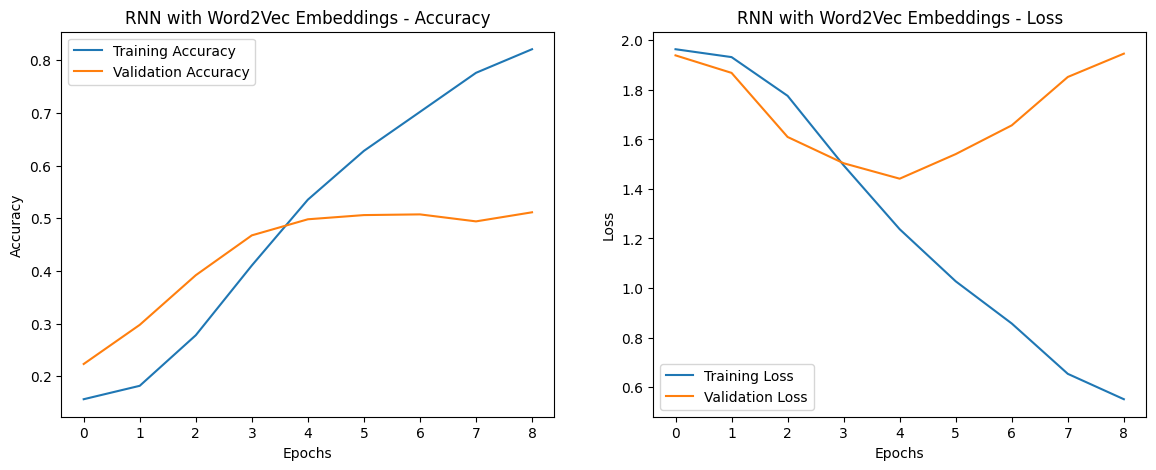


=== RNN with Word2Vec Embeddings ===
RNN with Word2Vec Embeddings - Best Validation Accuracy: 0.5113
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
RNN with Word2Vec Embeddings - Test Accuracy: 0.4728

Classification Report (RNN with Word2Vec Embeddings):
               precision    recall  f1-score   support

           0       0.50      0.59      0.54       108
           1       0.46      0.32      0.38       109
           2       0.26      0.51      0.34       105
           3       0.63      0.68      0.65       109
           4       0.63      0.60      0.61        97
           5       0.69      0.41      0.52       119
           6       0.39      0.21      0.27       106

    accuracy                           0.47       753
   macro avg       0.51      0.47      0.47       753
weighted avg       0.51      0.47      0.47       753



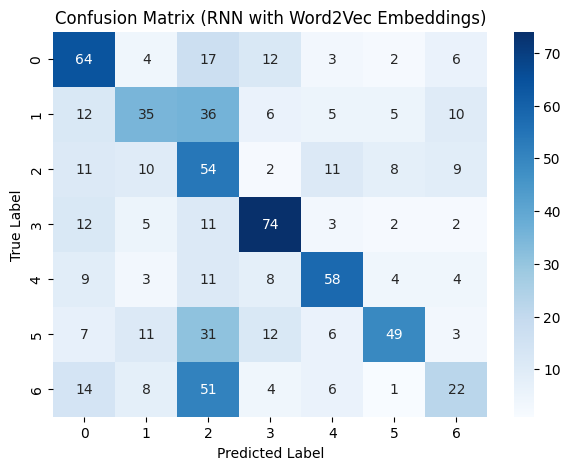

In [42]:
# Train and evaluate RNN model with Word2Vec embeddings
rnn_w2v = rnn_model(embedding_matrix_w2v, tokenizer.word_index, embedding_dim=300)
train_DL_model(rnn_w2v, X_train_pad, y_train_enc, X_val_pad, y_val_enc, X_test_pad, y_test_enc, model_name="RNN with Word2Vec Embeddings")

Epoch 1/10
377/377 - 15s - 38ms/step - accuracy: 0.1490 - loss: 1.9700 - val_accuracy: 0.1501 - val_loss: 1.9413 - learning_rate: 0.0010
Epoch 2/10
377/377 - 11s - 30ms/step - accuracy: 0.1857 - loss: 1.9192 - val_accuracy: 0.2337 - val_loss: 1.7964 - learning_rate: 0.0010
Epoch 3/10
377/377 - 12s - 31ms/step - accuracy: 0.2556 - loss: 1.7505 - val_accuracy: 0.2696 - val_loss: 1.7169 - learning_rate: 0.0010
Epoch 4/10
377/377 - 12s - 31ms/step - accuracy: 0.3286 - loss: 1.5402 - val_accuracy: 0.3293 - val_loss: 1.6317 - learning_rate: 0.0010
Epoch 5/10
377/377 - 12s - 31ms/step - accuracy: 0.4114 - loss: 1.3573 - val_accuracy: 0.3625 - val_loss: 1.7067 - learning_rate: 0.0010
Epoch 6/10
377/377 - 12s - 32ms/step - accuracy: 0.5026 - loss: 1.1964 - val_accuracy: 0.4064 - val_loss: 1.8436 - learning_rate: 0.0010
Epoch 7/10
377/377 - 12s - 32ms/step - accuracy: 0.6040 - loss: 0.9903 - val_accuracy: 0.4276 - val_loss: 1.9748 - learning_rate: 5.0000e-04
Epoch 8/10
377/377 - 12s - 32ms/step 

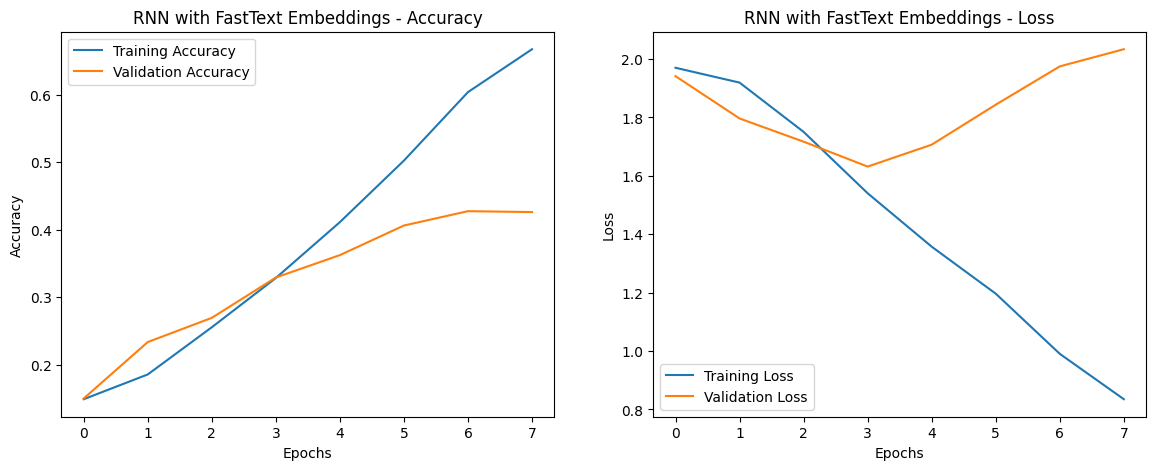


=== RNN with FastText Embeddings ===
RNN with FastText Embeddings - Best Validation Accuracy: 0.4276
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RNN with FastText Embeddings - Test Accuracy: 0.3333

Classification Report (RNN with FastText Embeddings):
               precision    recall  f1-score   support

           0       0.35      0.58      0.44       108
           1       0.00      0.00      0.00       109
           2       0.23      0.37      0.28       105
           3       0.41      0.34      0.37       109
           4       0.63      0.47      0.54        97
           5       0.28      0.55      0.37       119
           6       0.00      0.00      0.00       106

    accuracy                           0.33       753
   macro avg       0.27      0.33      0.29       753
weighted avg       0.27      0.33      0.28       753



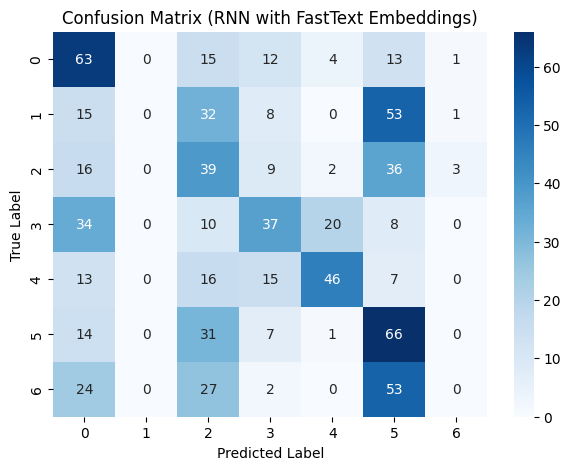

In [43]:
# Train and evaluate RNN model with FastText embeddings
rnn_ft = rnn_model(embedding_matrix_ft, tokenizer.word_index, embedding_dim=300)
train_DL_model(rnn_ft, X_train_pad, y_train_enc, X_val_pad, y_val_enc, X_test_pad, y_test_enc, model_name="RNN with FastText Embeddings")

### 6.2.3 Bi-LSTM

In [44]:
# Bi-LSTM model without attention mechanism *Baseline*
def bilstm_model(embedding_matrix, word_index, embedding_dim=300):
    model = Sequential([
        Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim,
                  weights=[embedding_matrix], input_length=max_len, trainable=True),
        Bidirectional(LSTM(128, return_sequences=True, activation='tanh', 
                           kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001))),
        BatchNormalization(),
        Dropout(0.3),
        Bidirectional(LSTM(64, activation='tanh', 
                           kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001))),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(len(set(y_train)), activation='softmax')
    ])
    optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Embedding -> Bi-LSTM (128, L2 regularization) ->Batch Normalization + Dropout ->Bi-LSTM (64, L2 regularization) -> Batch Normalization + Dropout -> Dense -> SoftMax
- Regularization-heavy (L2, dropout, batch norm) to combat overfitting.
- No attention mechanism, relies purely on LSTM context.
- Baseline

Epoch 1/10
377/377 - 51s - 136ms/step - accuracy: 0.1774 - loss: 3.9394 - val_accuracy: 0.2603 - val_loss: 3.4112 - learning_rate: 1.0000e-04
Epoch 2/10
377/377 - 47s - 124ms/step - accuracy: 0.2571 - loss: 3.4540 - val_accuracy: 0.3865 - val_loss: 3.0632 - learning_rate: 1.0000e-04
Epoch 3/10
377/377 - 53s - 139ms/step - accuracy: 0.3331 - loss: 3.1287 - val_accuracy: 0.4223 - val_loss: 2.8327 - learning_rate: 1.0000e-04
Epoch 4/10
377/377 - 53s - 140ms/step - accuracy: 0.3928 - loss: 2.8709 - val_accuracy: 0.4781 - val_loss: 2.6399 - learning_rate: 1.0000e-04
Epoch 5/10
377/377 - 52s - 138ms/step - accuracy: 0.4481 - loss: 2.6510 - val_accuracy: 0.4900 - val_loss: 2.4799 - learning_rate: 1.0000e-04
Epoch 6/10
377/377 - 52s - 138ms/step - accuracy: 0.5042 - loss: 2.4513 - val_accuracy: 0.4874 - val_loss: 2.3910 - learning_rate: 1.0000e-04
Epoch 7/10
377/377 - 52s - 138ms/step - accuracy: 0.5389 - loss: 2.2889 - val_accuracy: 0.5219 - val_loss: 2.3020 - learning_rate: 1.0000e-04
Epoch 

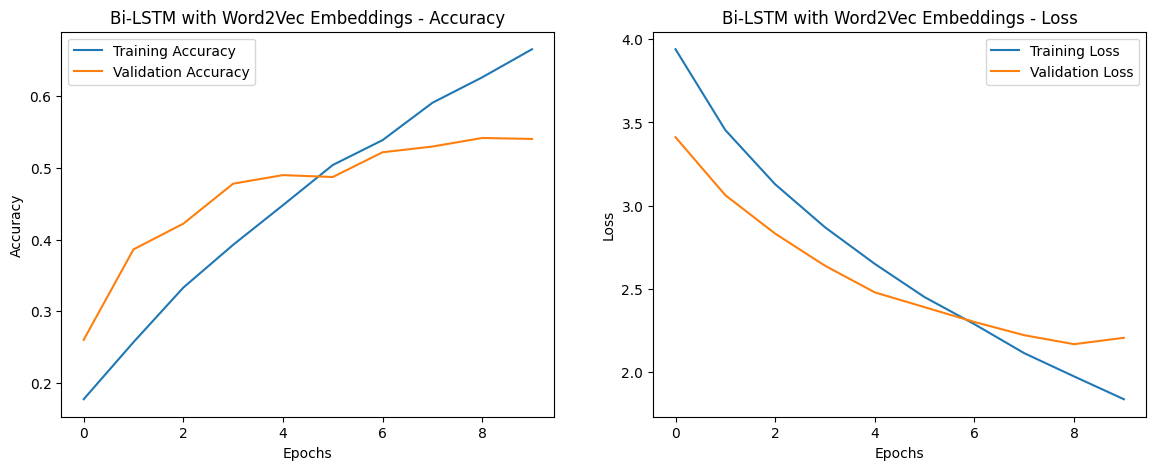


=== Bi-LSTM with Word2Vec Embeddings ===
Bi-LSTM with Word2Vec Embeddings - Best Validation Accuracy: 0.5418
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
Bi-LSTM with Word2Vec Embeddings - Test Accuracy: 0.5432

Classification Report (Bi-LSTM with Word2Vec Embeddings):
               precision    recall  f1-score   support

           0       0.57      0.57      0.57       108
           1       0.46      0.40      0.43       109
           2       0.39      0.34      0.37       105
           3       0.61      0.75      0.67       109
           4       0.62      0.69      0.65        97
           5       0.57      0.54      0.55       119
           6       0.53      0.51      0.52       106

    accuracy                           0.54       753
   macro avg       0.54      0.54      0.54       753
weighted avg       0.54      0.54      0.54       753



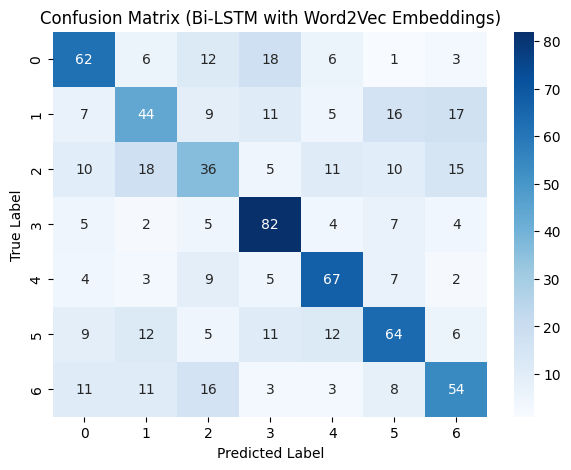

In [45]:
# Train and evaluate Bi-LSTM model with Word2Vec embeddings
bilstm_w2v = bilstm_model(embedding_matrix_w2v, tokenizer.word_index, embedding_dim=300)
train_DL_model(bilstm_w2v, X_train_pad, y_train_enc, X_val_pad, y_val_enc, X_test_pad, y_test_enc, model_name="Bi-LSTM with Word2Vec Embeddings")

Epoch 1/10
377/377 - 59s - 156ms/step - accuracy: 0.1820 - loss: 3.8422 - val_accuracy: 0.2643 - val_loss: 3.3957 - learning_rate: 1.0000e-04
Epoch 2/10
377/377 - 47s - 124ms/step - accuracy: 0.2747 - loss: 3.3317 - val_accuracy: 0.4382 - val_loss: 2.9333 - learning_rate: 1.0000e-04
Epoch 3/10
377/377 - 45s - 120ms/step - accuracy: 0.3745 - loss: 2.9628 - val_accuracy: 0.4595 - val_loss: 2.6834 - learning_rate: 1.0000e-04
Epoch 4/10
377/377 - 51s - 136ms/step - accuracy: 0.4574 - loss: 2.6478 - val_accuracy: 0.5286 - val_loss: 2.4588 - learning_rate: 1.0000e-04
Epoch 5/10
377/377 - 52s - 139ms/step - accuracy: 0.5307 - loss: 2.3842 - val_accuracy: 0.5126 - val_loss: 2.3878 - learning_rate: 1.0000e-04
Epoch 6/10
377/377 - 52s - 137ms/step - accuracy: 0.6015 - loss: 2.1479 - val_accuracy: 0.5471 - val_loss: 2.3220 - learning_rate: 1.0000e-04
Epoch 7/10
377/377 - 52s - 137ms/step - accuracy: 0.6563 - loss: 1.9562 - val_accuracy: 0.5498 - val_loss: 2.2915 - learning_rate: 1.0000e-04
Epoch 

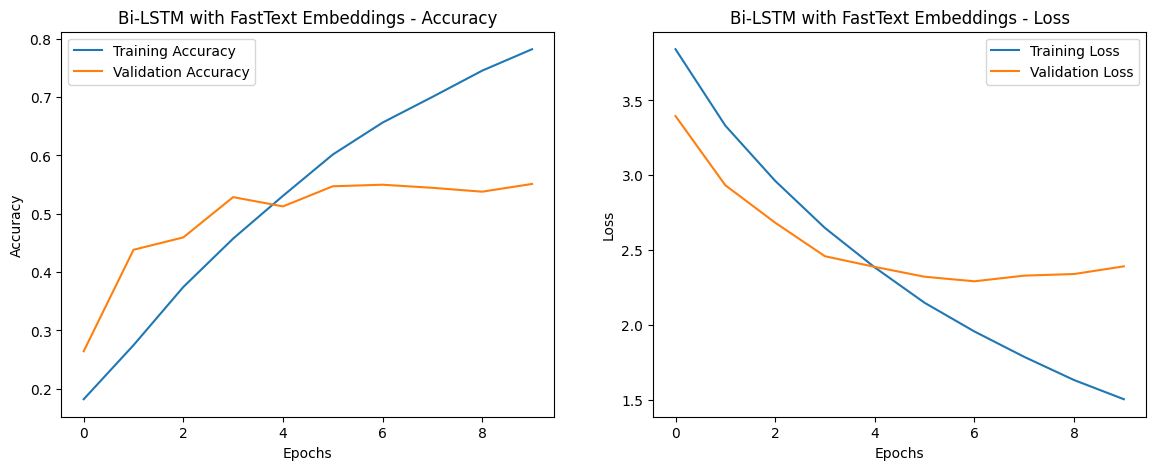


=== Bi-LSTM with FastText Embeddings ===
Bi-LSTM with FastText Embeddings - Best Validation Accuracy: 0.5511
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
Bi-LSTM with FastText Embeddings - Test Accuracy: 0.5458

Classification Report (Bi-LSTM with FastText Embeddings):
               precision    recall  f1-score   support

           0       0.63      0.62      0.62       108
           1       0.46      0.38      0.41       109
           2       0.40      0.36      0.38       105
           3       0.64      0.74      0.69       109
           4       0.67      0.62      0.65        97
           5       0.51      0.63      0.56       119
           6       0.51      0.46      0.48       106

    accuracy                           0.55       753
   macro avg       0.54      0.54      0.54       753
weighted avg       0.54      0.55      0.54       753



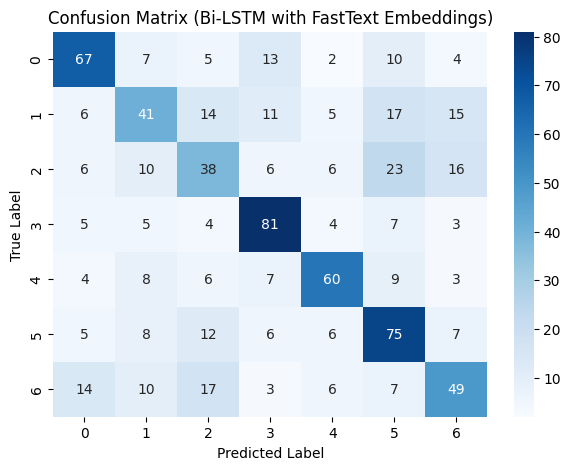

In [46]:
# Train and evaluate Bi-LSTM model with FastText embeddings
bilstm_ft = bilstm_model(embedding_matrix_ft, tokenizer.word_index, embedding_dim=300)
train_DL_model(bilstm_ft, X_train_pad, y_train_enc, X_val_pad, y_val_enc, X_test_pad, y_test_enc, model_name="Bi-LSTM with FastText Embeddings")

In [47]:
# Bi-LSTM with Multi-Head Attention model
def multihead_attention_bilstm(embedding_matrix, word_index):
    inputs = Input(shape=(max_len,))
    
    # Embedding Layer (enable masking)
    x = Embedding(
        input_dim=len(word_index) + 1,
        output_dim=300,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=True,
        mask_zero=True
    )(inputs)
    
    # Bi-LSTM Layer
    x = Bidirectional(LSTM(
        64, 
        return_sequences=True,
        dropout=0.3
    ))(x)  # Output shape: (batch_size, max_len, 128)
    
    # Attention Mechanism (using MultiHeadAttention for better stability)
    attention = tf.keras.layers.MultiHeadAttention(
        num_heads=4, key_dim=64, dropout=0.3
    )(x, x)  # Self-attention (query, value)

    # Residual Connection and Layer Normalization
    x = tf.keras.layers.Add()([x, attention])
    x = LayerNormalization()(x)
    
    # Pooling and Classification
    x = GlobalMaxPooling1D()(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(len(label_encoder.classes_), activation='softmax')(x)
    
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=1e-4,
        clipnorm=1.0
    )
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


Embedding -> Bi-LSTM (64) -> Multi-Head Attention (4 heads) -> Residual connection + Layer normalization -> Global Max Pooling -> Dense (64 ReLU, L2 regularization + Dropout) -> Softmax
- Better generalization with dropout and regularization 
- More computationally expensive, complex

Epoch 1/50
189/189 - 39s - 209ms/step - accuracy: 0.1678 - loss: 2.1497 - val_accuracy: 0.2483 - val_loss: 1.9123 - learning_rate: 1.0000e-04
Epoch 2/50
189/189 - 32s - 171ms/step - accuracy: 0.2116 - loss: 1.9281 - val_accuracy: 0.3227 - val_loss: 1.8186 - learning_rate: 1.0000e-04
Epoch 3/50
189/189 - 33s - 173ms/step - accuracy: 0.2626 - loss: 1.8551 - val_accuracy: 0.3997 - val_loss: 1.6913 - learning_rate: 1.0000e-04
Epoch 4/50
189/189 - 30s - 156ms/step - accuracy: 0.3182 - loss: 1.7629 - val_accuracy: 0.4356 - val_loss: 1.5644 - learning_rate: 1.0000e-04
Epoch 5/50
189/189 - 36s - 191ms/step - accuracy: 0.3645 - loss: 1.6757 - val_accuracy: 0.4635 - val_loss: 1.4723 - learning_rate: 1.0000e-04
Epoch 6/50
189/189 - 34s - 181ms/step - accuracy: 0.3990 - loss: 1.6056 - val_accuracy: 0.4847 - val_loss: 1.3975 - learning_rate: 1.0000e-04
Epoch 7/50
189/189 - 34s - 182ms/step - accuracy: 0.4249 - loss: 1.5425 - val_accuracy: 0.5100 - val_loss: 1.3534 - learning_rate: 1.0000e-04
Epoch 

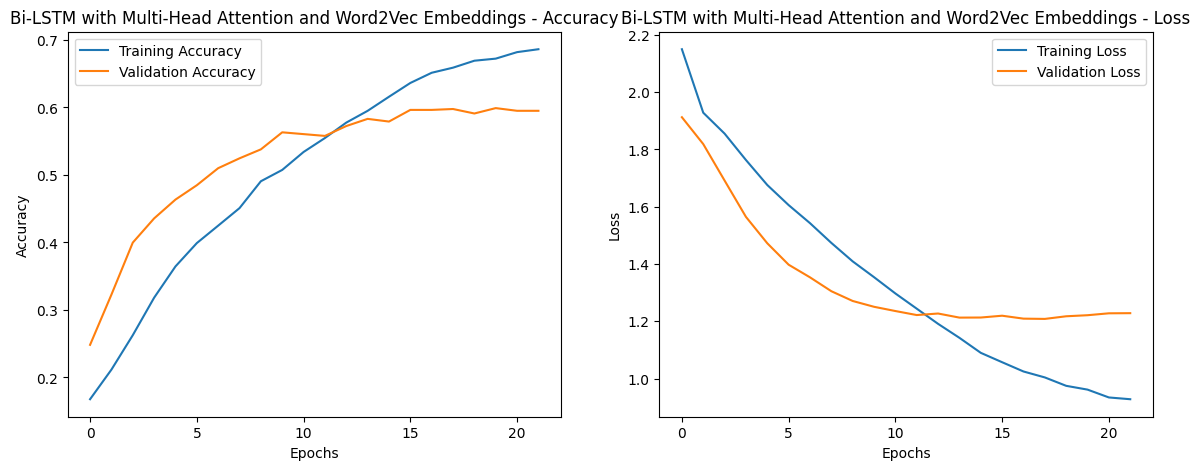


=== Bi-LSTM with Multi-Head Attention and Word2Vec Embeddings ===
Bi-LSTM with Multi-Head Attention and Word2Vec Embeddings - Best Validation Accuracy: 0.5989
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
Bi-LSTM with Multi-Head Attention and Word2Vec Embeddings - Test Accuracy: 0.5817

Classification Report (Bi-LSTM with Multi-Head Attention and Word2Vec Embeddings):
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       108
           1       0.55      0.41      0.47       109
           2       0.44      0.45      0.45       105
           3       0.64      0.75      0.69       109
           4       0.67      0.72      0.70        97
           5       0.59      0.59      0.59       119
           6       0.53      0.53      0.53       106

    accuracy                           0.58       753
   macro avg       0.58      0.58      0.58       753
weighted avg       0.58      0.58      0.58       753



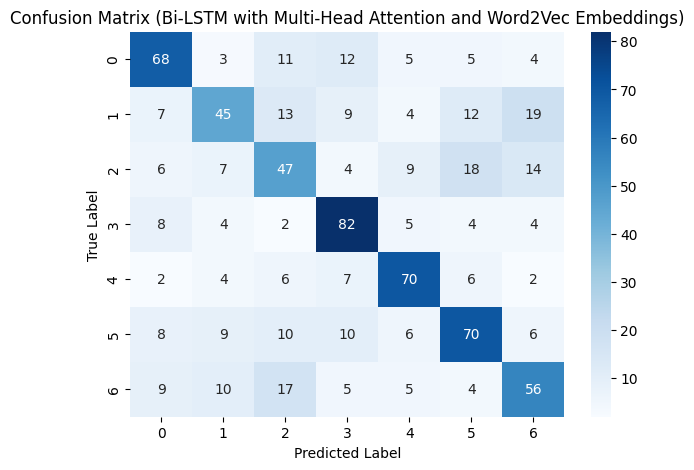

In [48]:
# Train and evaluate Bi-LSTM model with Multi-Head Attention and Word2Vec embeddings
multihead_bilstm_w2v = multihead_attention_bilstm(embedding_matrix_w2v, tokenizer.word_index)
train_DL_model(multihead_bilstm_w2v, X_train_pad, y_train_enc, X_val_pad, y_val_enc, X_test_pad, y_test_enc, model_name="Bi-LSTM with Multi-Head Attention and Word2Vec Embeddings", epochs=50,batch_size=64)


Epoch 1/50
189/189 - 35s - 183ms/step - accuracy: 0.1607 - loss: 2.0795 - val_accuracy: 0.2085 - val_loss: 1.9327 - learning_rate: 1.0000e-04
Epoch 2/50
189/189 - 30s - 157ms/step - accuracy: 0.1872 - loss: 1.9469 - val_accuracy: 0.2683 - val_loss: 1.9052 - learning_rate: 1.0000e-04
Epoch 3/50
189/189 - 34s - 180ms/step - accuracy: 0.2208 - loss: 1.9058 - val_accuracy: 0.3201 - val_loss: 1.8344 - learning_rate: 1.0000e-04
Epoch 4/50
189/189 - 35s - 184ms/step - accuracy: 0.2589 - loss: 1.8533 - val_accuracy: 0.3984 - val_loss: 1.7265 - learning_rate: 1.0000e-04
Epoch 5/50
189/189 - 32s - 171ms/step - accuracy: 0.3067 - loss: 1.7730 - val_accuracy: 0.4502 - val_loss: 1.5931 - learning_rate: 1.0000e-04
Epoch 6/50
189/189 - 40s - 213ms/step - accuracy: 0.3616 - loss: 1.6642 - val_accuracy: 0.4807 - val_loss: 1.4812 - learning_rate: 1.0000e-04
Epoch 7/50
189/189 - 36s - 189ms/step - accuracy: 0.4029 - loss: 1.5818 - val_accuracy: 0.5046 - val_loss: 1.3920 - learning_rate: 1.0000e-04
Epoch 

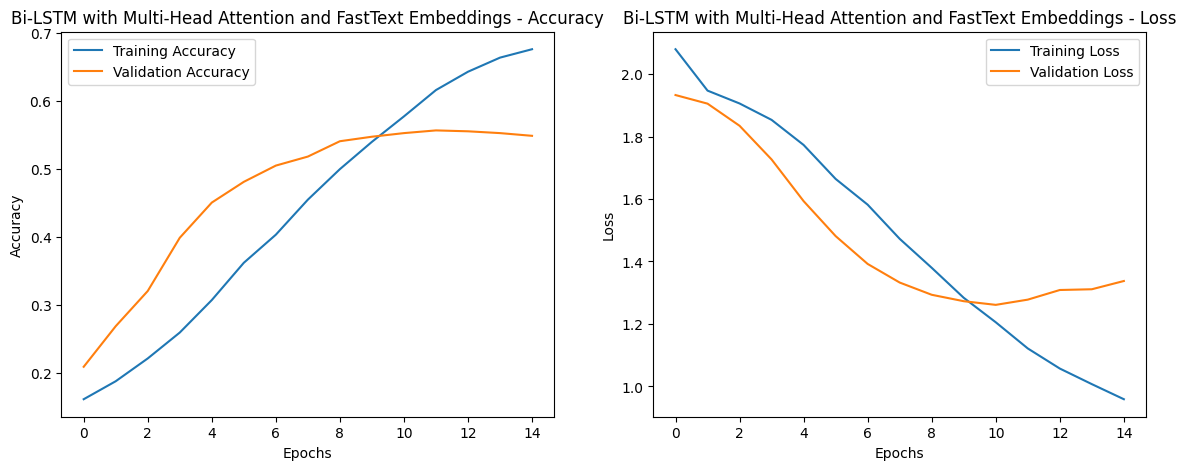


=== Bi-LSTM with Multi-Head Attention and FastText Embeddings ===
Bi-LSTM with Multi-Head Attention and FastText Embeddings - Best Validation Accuracy: 0.5564
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
Bi-LSTM with Multi-Head Attention and FastText Embeddings - Test Accuracy: 0.5498

Classification Report (Bi-LSTM with Multi-Head Attention and FastText Embeddings):
               precision    recall  f1-score   support

           0       0.54      0.63      0.58       108
           1       0.53      0.44      0.48       109
           2       0.37      0.32      0.34       105
           3       0.60      0.72      0.65       109
           4       0.64      0.66      0.65        97
           5       0.62      0.59      0.61       119
           6       0.50      0.49      0.50       106

    accuracy                           0.55       753
   macro avg       0.54      0.55      0.55       753
weighted avg       0.55      0.55      0.55       753



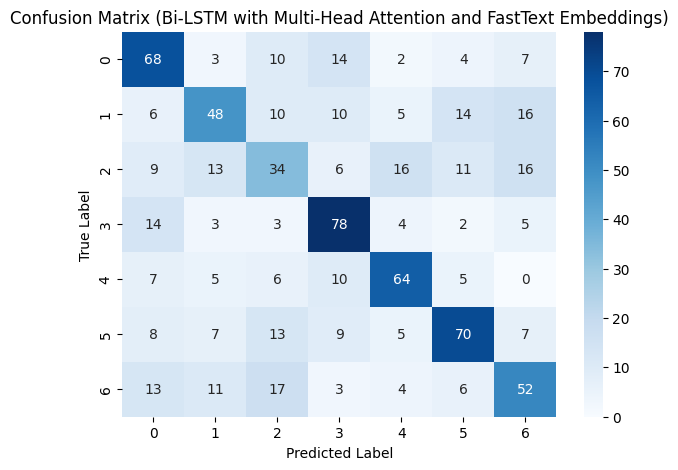

In [49]:
# Train and evaluate Bi-LSTM model with Multi-Head Attention and FastText embeddings
multihead_bilstm_ft = multihead_attention_bilstm(embedding_matrix_ft, tokenizer.word_index)
train_DL_model(multihead_bilstm_ft, X_train_pad, y_train_enc, X_val_pad, y_val_enc, X_test_pad, y_test_enc, model_name="Bi-LSTM with Multi-Head Attention and FastText Embeddings", epochs=50,batch_size=64)


In [50]:
# Bi-LSTM with Bahdanau Attention model
def bahdanau_attention_bilstm(embedding_matrix, word_index):
    inputs = tf.keras.Input(shape=(max_len,))
    
    # Embedding layer (freeze initially if dataset is small)
    x = Embedding(
        len(word_index)+1, 300,
        weights=[embedding_matrix],
        trainable=False  # Freeze embeddings to reduce overfitting
    )(inputs)
    
    # Bi-LSTM with dropout
    x = Bidirectional(LSTM(
        64, 
        return_sequences=True,
        dropout=0.3,  # Recurrent dropout
        kernel_regularizer=l2(1e-4)  # Weight regularization
    ))(x)
    
    # Bahdanau Attention
    query = Dense(64)(x)
    value = Dense(64)(x)
    attention = tf.keras.layers.AdditiveAttention()([query, value])
    
    # Concatenate + LayerNorm
    x = Concatenate()([x, attention])
    x = LayerNormalization()(x)
    
    # GlobalMaxPooling (better for sparse emotional keywords)
    x = GlobalMaxPooling1D()(x)
    
    # Classifier with dropout
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(len(label_encoder.classes_), activation='softmax')(x)
    
    # Optimizer with gradient clipping
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=1e-4,  # Lower learning rate
        clipnorm=1.0
    )
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Embedding -> Bi-LSTM (64) -> Bahdanau Attention (4 heads) -> Concatenation + Layer normalization -> Global Max Pooling -> Dense (64 ReLU, L2 regularization + Dropout) -> Softmax
- Frozen embeddings prevent overfitting, explicit additive attention 
- Limited adaptability if embeddings need tuning

Epoch 1/50
189/189 - 35s - 183ms/step - accuracy: 0.6688 - loss: 0.9721 - val_accuracy: 0.5976 - val_loss: 1.2129 - learning_rate: 1.2500e-05
Epoch 2/50
189/189 - 34s - 182ms/step - accuracy: 0.6704 - loss: 0.9752 - val_accuracy: 0.5976 - val_loss: 1.2164 - learning_rate: 1.2500e-05
Epoch 3/50
189/189 - 37s - 193ms/step - accuracy: 0.6725 - loss: 0.9732 - val_accuracy: 0.5923 - val_loss: 1.2170 - learning_rate: 1.2500e-05
Epoch 4/50
189/189 - 35s - 183ms/step - accuracy: 0.6767 - loss: 0.9603 - val_accuracy: 0.5950 - val_loss: 1.2191 - learning_rate: 6.2500e-06
Epoch 5/50
189/189 - 36s - 188ms/step - accuracy: 0.6804 - loss: 0.9547 - val_accuracy: 0.5950 - val_loss: 1.2197 - learning_rate: 6.2500e-06


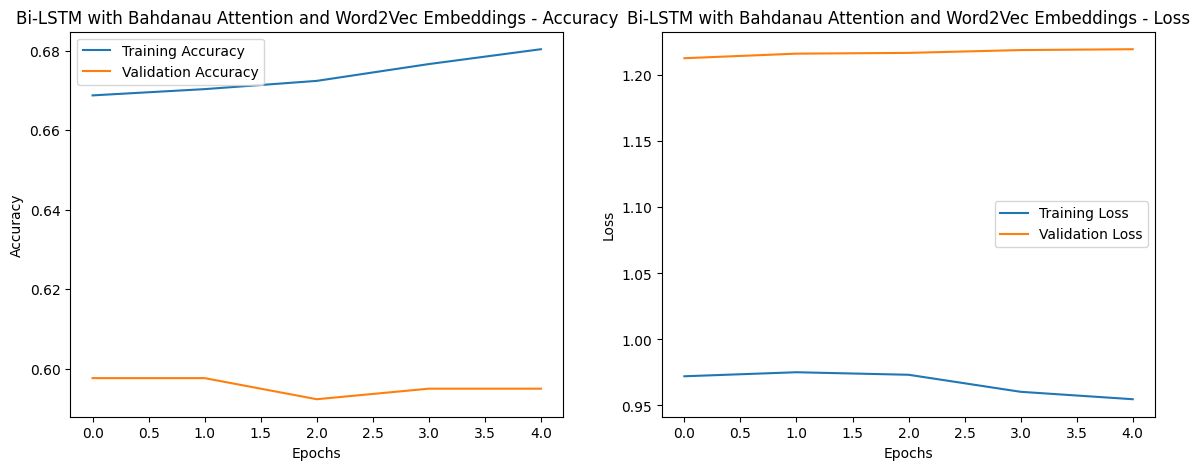


=== Bi-LSTM with Bahdanau Attention and Word2Vec Embeddings ===
Bi-LSTM with Bahdanau Attention and Word2Vec Embeddings - Best Validation Accuracy: 0.5976
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Bi-LSTM with Bahdanau Attention and Word2Vec Embeddings - Test Accuracy: 0.5790

Classification Report (Bi-LSTM with Bahdanau Attention and Word2Vec Embeddings):
               precision    recall  f1-score   support

           0       0.62      0.63      0.63       108
           1       0.52      0.40      0.46       109
           2       0.45      0.45      0.45       105
           3       0.63      0.74      0.68       109
           4       0.66      0.75      0.71        97
           5       0.60      0.57      0.58       119
           6       0.53      0.52      0.53       106

    accuracy                           0.58       753
   macro avg       0.57      0.58      0.58       753
weighted avg       0.57      0.58      0.57       753



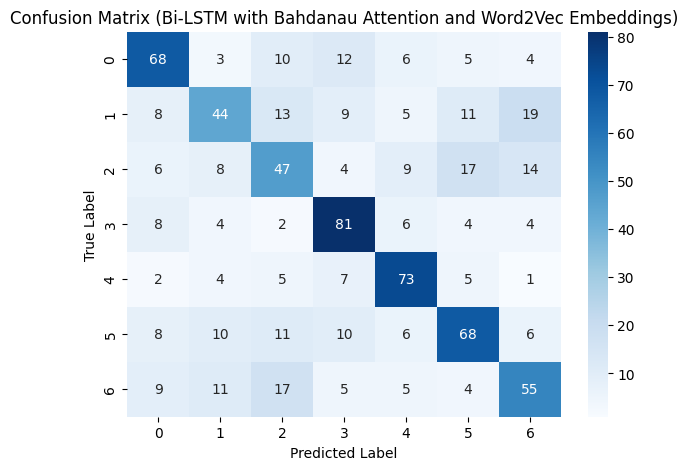

In [51]:
# Train and evaluate Bi-LSTM model with Bahdanau Attention and Word2Vec embeddings
bahdanau_bilstm_w2v = bahdanau_attention_bilstm(embedding_matrix_w2v, tokenizer.word_index)
train_DL_model(multihead_bilstm_w2v, X_train_pad, y_train_enc, X_val_pad, y_val_enc, X_test_pad, y_test_enc, model_name="Bi-LSTM with Bahdanau Attention and Word2Vec Embeddings", epochs=50,batch_size=64)

Epoch 1/50
189/189 - 32s - 170ms/step - accuracy: 0.6081 - loss: 1.1351 - val_accuracy: 0.5498 - val_loss: 1.2664 - learning_rate: 2.5000e-05
Epoch 2/50
189/189 - 36s - 191ms/step - accuracy: 0.6187 - loss: 1.1079 - val_accuracy: 0.5432 - val_loss: 1.2762 - learning_rate: 2.5000e-05
Epoch 3/50
189/189 - 35s - 186ms/step - accuracy: 0.6186 - loss: 1.1045 - val_accuracy: 0.5551 - val_loss: 1.2711 - learning_rate: 2.5000e-05
Epoch 4/50
189/189 - 34s - 181ms/step - accuracy: 0.6234 - loss: 1.0881 - val_accuracy: 0.5551 - val_loss: 1.2722 - learning_rate: 1.2500e-05
Epoch 5/50
189/189 - 37s - 196ms/step - accuracy: 0.6279 - loss: 1.0828 - val_accuracy: 0.5511 - val_loss: 1.2809 - learning_rate: 1.2500e-05


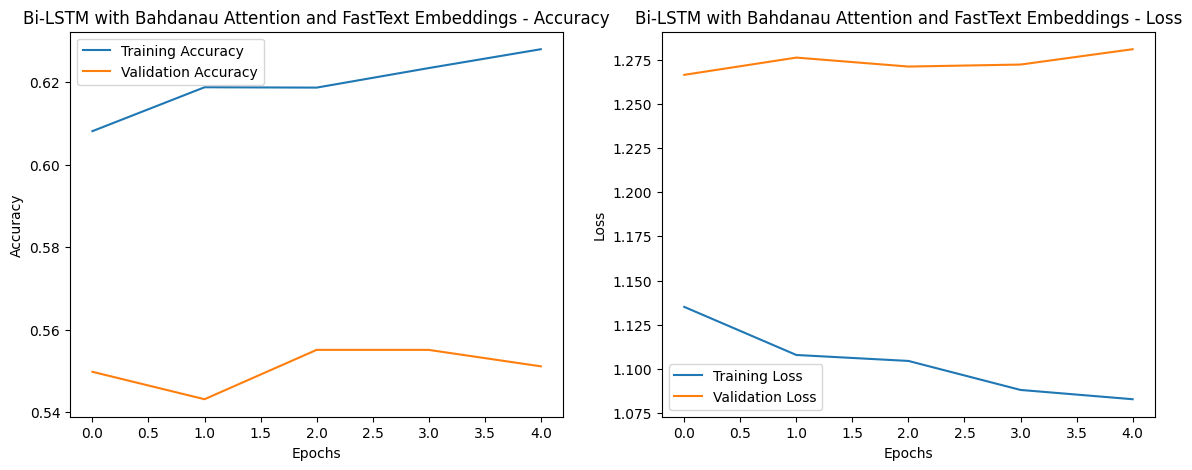


=== Bi-LSTM with Bahdanau Attention and FastText Embeddings ===
Bi-LSTM with Bahdanau Attention and FastText Embeddings - Best Validation Accuracy: 0.5551
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Bi-LSTM with Bahdanau Attention and FastText Embeddings - Test Accuracy: 0.5551

Classification Report (Bi-LSTM with Bahdanau Attention and FastText Embeddings):
               precision    recall  f1-score   support

           0       0.55      0.64      0.59       108
           1       0.54      0.49      0.51       109
           2       0.38      0.30      0.33       105
           3       0.60      0.72      0.65       109
           4       0.65      0.66      0.65        97
           5       0.65      0.60      0.62       119
           6       0.49      0.49      0.49       106

    accuracy                           0.56       753
   macro avg       0.55      0.55      0.55       753
weighted avg       0.55      0.56      0.55       753



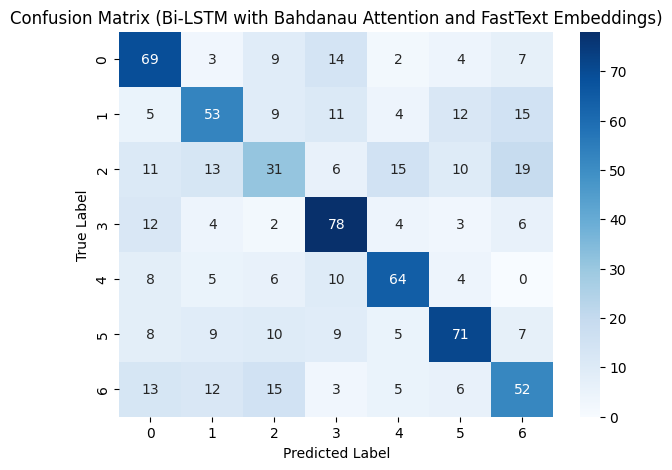

In [52]:
# Train and evaluate Bi-LSTM model with Bahdanau Attention and FastText embeddings
bahdanau_bilstm_ft = bahdanau_attention_bilstm(embedding_matrix_ft, tokenizer.word_index)
train_DL_model(multihead_bilstm_ft, X_train_pad, y_train_enc, X_val_pad, y_val_enc, X_test_pad, y_test_enc, model_name="Bi-LSTM with Bahdanau Attention and FastText Embeddings", epochs=50,batch_size=64)

## 6.3 Transformers
- BERT
- XLNet
- DistilBERT
- RoBERTa


In [60]:
# Convert tokens back to text for Transformers withouot data augmentation
X_train_trans = [' '.join(tokens) for tokens in X_train]
X_val_trans = [' '.join(tokens) for tokens in X_val]
X_test_trans = [' '.join(tokens) for tokens in X_test]

In [61]:
# Encoding labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

In [62]:
# Function for tokenization for Transformers
def encode_texts(texts, tokenizer, max_length):
    return tokenizer(
        texts,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )

In [63]:
# Function to train a transformer model
def train_transformer_model(model, train_encodings, y_train, val_encodings, y_val, epochs=3):
    history = model.fit(
        {'input_ids': train_encodings['input_ids'],
         'attention_mask': train_encodings['attention_mask']},
        y_train,
        validation_data=(
            {'input_ids': val_encodings['input_ids'],
             'attention_mask': val_encodings['attention_mask']},
            y_val
        ),
        epochs=epochs,
        batch_size=8,
        use_multiprocessing=True,
        workers=4
    )
    
    # Plot Training History - Accuracy and Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training History - Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training History - Loss')
    plt.legend()
    plt.show()
    
    best_val_acc = max(history.history['val_accuracy'])
    print(f'Best Validation Accuracy: {best_val_acc:.4f}')

    return history 

In [64]:
# Function to evaluate Transformer models
def evaluate_model(model, test_encodings, y_test, label_encoder, model_name):
  print(f"=== {model_name} ===")
  
  # Evaluate the model on the test set
  test_results = model.evaluate(
      {'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask']},
      y_test
  )
  print(f'{model_name} Test Accuracy: {test_results[1]:.4f}')

  # Make predictions on test set
  y_pred = np.argmax(model.predict({
      'input_ids': test_encodings['input_ids'],
      'attention_mask': test_encodings['attention_mask']
  }).logits, axis=1)

  # Classification Report
  print(f'Classification Report ({model_name}):')
  print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

  # Confusion Matrix
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=label_encoder.classes_,
              yticklabels=label_encoder.classes_)
  plt.title(f'{model_name} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

  return y_pred  # Return predictions for ensemble learning

In [ ]:
# Define parameters
max_len = 64
num_labels = len(label_encoder.classes_)
num_train_samples = len(X_train_trans)
batch_size = 8
epochs = 3
num_train_steps = (num_train_samples // batch_size) * epochs

def compile_transformer_model(model, num_train_steps):
    optimizer, _ = create_optimizer(
        init_lr=3e-5,  
        num_train_steps=num_train_steps,
        num_warmup_steps=int(0.1 * num_train_steps),
        weight_decay_rate=0.01
    )
    
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

: 

### 6.3.1 BERT

In [ ]:
# BERT model *Baseline*
def load_bert_model(num_labels, num_train_steps):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = TFBertForSequenceClassification.from_pretrained(
        'bert-base-uncased',
        num_labels=num_labels
    )
    compile_transformer_model(model, num_train_steps)
    return tokenizer, model

# BERT pipeline
tokenizer_bert, bert_model = load_bert_model(num_labels, num_train_steps)
train_encodings_bert = encode_texts(X_train_trans, tokenizer_bert, max_len)
val_encodings_bert = encode_texts(X_val_trans, tokenizer_bert, max_len)
test_encodings_bert = encode_texts(X_test_trans, tokenizer_bert, max_len)

bert_history = train_transformer_model(bert_model, train_encodings_bert, y_train_enc, val_encodings_bert, y_val_enc)
y_pred_bert = evaluate_model(bert_model, test_encodings_bert, y_test_enc, label_encoder, 'BERT')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
753/753 [==============================] - 8100s 11s/step - loss: 1.4645 - accuracy: 0.4598 - val_loss: 1.1309 - val_accuracy: 0.5910
Epoch 2/3
 19/753 [..............................] - ETA: 23:02 - loss: 1.0027 - accuracy: 0.6645

### 6.3.2 XLNet

In [ ]:
# XLNet model
def load_xlnet_model(num_labels, num_train_steps):
    tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
    model = TFXLNetForSequenceClassification.from_pretrained(
        'xlnet-base-cased',
        num_labels=num_labels
    )
    compile_transformer_model(model, num_train_steps)
    return tokenizer, model

# XLNet pipeline
tokenizer_xlnet, xlnet_model = load_xlnet_model(num_labels, num_train_steps)
train_encodings_xlnet = encode_texts(X_train_trans, tokenizer_xlnet, max_len)
val_encodings_xlnet = encode_texts(X_val_trans, tokenizer_xlnet, max_len)
test_encodings_xlnet = encode_texts(X_test_trans, tokenizer_xlnet, max_len)

xlnet_history = train_transformer_model(xlnet_model, train_encodings_xlnet, y_train_enc, val_encodings_xlnet, y_val_enc)
y_pred_xlnet = evaluate_model(xlnet_model, test_encodings_xlnet, y_test_enc, label_encoder, 'XLNet')

### 6.3.3 DistilBERT

In [ ]:
# DistilBERT model
def load_distilbert_model(num_labels, num_train_steps):
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
    model = TFDistilBertForSequenceClassification.from_pretrained(
        'distilbert-base-uncased',
        num_labels=num_labels
    )
    compile_transformer_model(model, num_train_steps)
    return tokenizer, model

# DistilBERT pipeline
tokenizer_distilbert, distilbert_model = load_distilbert_model(num_labels, num_train_steps)
train_encodings_distilbert = encode_texts(X_train_trans, tokenizer_distilbert, max_len)
val_encodings_distilbert = encode_texts(X_val_trans, tokenizer_distilbert, max_len)
test_encodings_distilbert = encode_texts(X_test_trans, tokenizer_distilbert, max_len)

distilbert_history = train_transformer_model(distilbert_model, train_encodings_distilbert, y_train_enc, val_encodings_distilbert, y_val_enc)
y_pred_distilbert = evaluate_model(distilbert_model, test_encodings_distilbert, y_test_enc, label_encoder, 'DistilBERT')

### 6.3.4 RoBERTa

In [ ]:
# RoBERTa model
def load_roberta_model(num_labels, num_train_steps):
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    model = TFRobertaForSequenceClassification.from_pretrained(
        'roberta-base',
        num_labels=num_labels
    )
    compile_transformer_model(model, num_train_steps)
    return tokenizer, model

# RoBERTa pipeline
tokenizer_roberta, roberta_model = load_roberta_model(num_labels, num_train_steps)
train_encodings_roberta = encode_texts(X_train_trans, tokenizer_roberta, max_len)
val_encodings_roberta = encode_texts(X_val_trans, tokenizer_roberta, max_len)
test_encodings_roberta = encode_texts(X_test_trans, tokenizer_roberta, max_len)

roberta_history = train_transformer_model(roberta_model, train_encodings_roberta, y_train_enc, val_encodings_roberta, y_val_enc)
y_pred_roberta = evaluate_model(roberta_model, test_encodings_roberta, y_test_enc, label_encoder, 'RoBERTa')

# 7.0 Deployment

In [ ]:
# Create model directory
model_dir = Path("model_directory")
model_dir.mkdir(exist_ok=True)

# Save individual models
bert_model.save_pretrained(model_dir/"bert_model")
xlnet_model.save_pretrained(model_dir/"xlnet_model")
roberta_model.save_pretrained(model_dir/"roberta_model")

# Save tokenizers
tokenizer_bert.save_pretrained(model_dir/"bert_tokenizer")
tokenizer_xlnet.save_pretrained(model_dir/"xlnet_tokenizer")
tokenizer_roberta.save_pretrained(model_dir/"roberta_tokenizer")

# Save label encoder
with open(model_dir/"label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# Save metadata 
metadata = {
    "max_len": max_len,
    "num_labels": num_labels,
}
with open(model_dir/"metadata.pkl", "wb") as f:
    pickle.dump(metadata, f)

In [ ]:
# Deployment
class SoftVotingEnsemble:
    def __init__(self, model_dir):
        self.model_dir = Path(model_dir)
        self.max_len = 64  # Update from metadata if saved
        
        # Load models
        self.bert_model = TFBertForSequenceClassification.from_pretrained(self.model_dir/"bert_model")
        self.xlnet_model = TFXLNetForSequenceClassification.from_pretrained(self.model_dir/"xlnet_model")
        self.roberta_model = TFRobertaForSequenceClassification.from_pretrained(self.model_dir/"roberta_model")
        
        # Load tokenizers
        self.bert_tokenizer = BertTokenizer.from_pretrained(self.model_dir/"bert_tokenizer")
        self.xlnet_tokenizer = XLNetTokenizer.from_pretrained(self.model_dir/"xlnet_tokenizer")
        self.roberta_tokenizer = RobertaTokenizer.from_pretrained(self.model_dir/"roberta_tokenizer")
        
        # Load label encoder
        with open(self.model_dir/"label_encoder.pkl", "rb") as f:
            self.label_encoder = pickle.load(f)
            
    def preprocess(self, text):
        def _encode(tokenizer, text):
            return tokenizer(
                text,
                truncation=True,
                padding='max_length',
                max_length=self.max_len,
                return_tensors='tf'
            )
        return {
            'bert': _encode(self.bert_tokenizer, text),
            'xlnet': _encode(self.xlnet_tokenizer, text),
            'roberta': _encode(self.roberta_tokenizer, text)
        }
    
    def predict(self, text):
        # Preprocess input
        encodings = self.preprocess(text)
        
        # Get probabilities from each model
        bert_probs = tf.nn.softmax(self.bert_model(encodings['bert']).logits, axis=1)
        xlnet_probs = tf.nn.softmax(self.xlnet_model(encodings['xlnet']).logits, axis=1)
        roberta_probs = tf.nn.softmax(self.roberta_model(encodings['roberta']).logits, axis=1)
        
        # Average probabilities
        avg_probs = (bert_probs + xlnet_probs + roberta_probs) / 3
        final_pred = np.argmax(avg_probs, axis=1)
        
        return self.label_encoder.inverse_transform(final_pred)[0]

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI()
ensemble = SoftVotingEnsemble("model directory")

class TextRequest(BaseModel):
    text: str

@app.post("/predict")
def predict(request: TextRequest):
    return {"prediction": ensemble.predict(request.text)}